In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
from utils.data import read_pickle, load_network
from utils.vis import reorder_cluster_ids, plot_raster, vis_heatmap, import_camera_ready_settings
from seaborn import heatmap

network_df = load_network()
obs_1ms_df = network_df.apply(lambda x: x.sum(0))
n_trials_1ms_df = network_df.apply(lambda x: x.shape[0])

n_ms = 10
obs_all = obs_1ms_df.apply(lambda x: x.reshape((-1, n_ms)).sum(1)).values.tolist()
n_trials_all = n_trials_1ms_df.values * n_ms
cue_time = 500 // n_ms

In [48]:
import_camera_ready_settings()

In [122]:
out = read_pickle('../pickle/sim_shift-8.p')
cluster_ids, cluster_params, n_clusters = reorder_cluster_ids(*out)

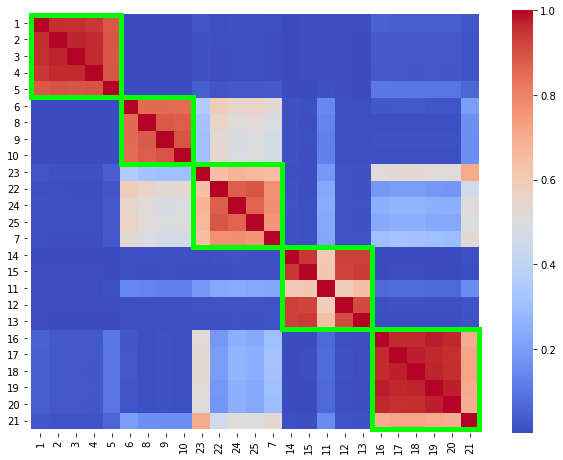

In [123]:
burnin = 1000
sim_mat, all_best_gibbs, all_sim_mats = vis_heatmap(cluster_ids[burnin:])
#plt.savefig('../img/sim_shift32.pdf')

In [124]:
all_best_idx = burnin + all_best_gibbs

In [125]:
np.mean(np.dstack([cluster_params[i] for i in all_best_idx]), axis=2).round(2)

array([[  0.79,  -8.71],
       [ -0.89, -11.5 ],
       [ -0.34,  -5.93],
       [  0.02, -10.41],
       [  0.34,  -4.96]])

In [97]:
np.dstack([cluster_params[i] for i in all_best_idx]).round(3)

array([[[ 0.191],
        [-5.292]],

       [[-0.141],
        [-4.4  ]],

       [[-0.084],
        [-2.376]],

       [[ 0.868],
        [-2.95 ]],

       [[-0.423],
        [-0.41 ]]])

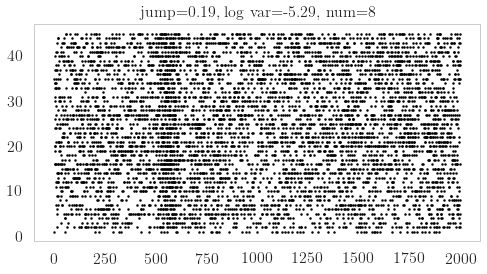

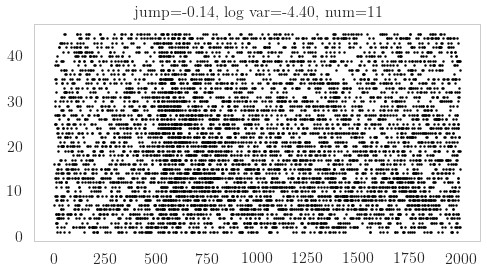

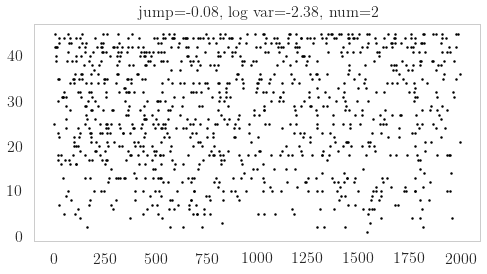

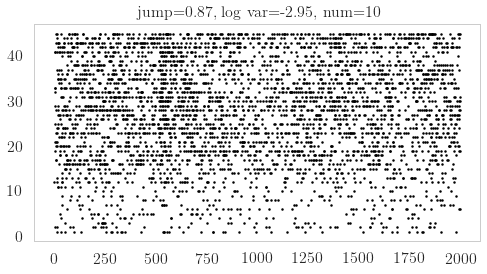

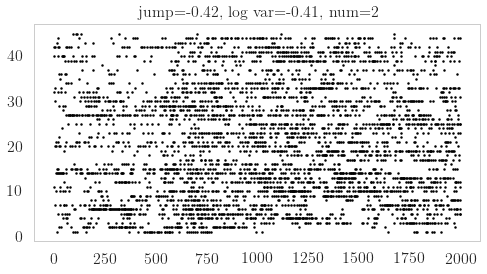

In [98]:
best_idx = all_best_idx[0]
best_ids = cluster_ids[best_idx]
for k in np.unique(best_ids):
    plt.figure(figsize=(8, 4))
    ids = np.arange(33)[best_ids == k]
    for n in ids:
        plot_raster(network_df.iloc[n], ms=5, offset=45-network_df.iloc[n].shape[0])
    plt.title('jump=%.2f, log var=%.2f, num=%d' % (cluster_params[best_idx][k][0], 
                                                   cluster_params[best_idx][k][1], 
                                                   ids.shape[0]))
    plt.show()

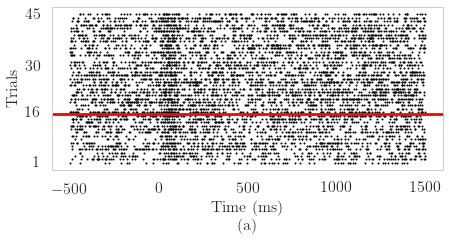

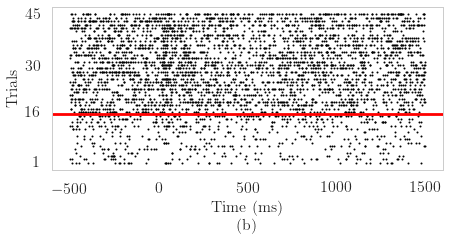

In [100]:
for k, label  in zip([0, 3], ['a', 'b']):
    plt.figure(figsize=(7, 3))
    ids = np.arange(33)[best_ids == k]
    for n in ids:
        plot_raster(network_df.iloc[n], ms=4, offset=45-network_df.iloc[n].shape[0], 
                    x_axis=np.arange(-500, 1500))
    plt.xticks([-500, 0, 500, 1000, 1500])
    plt.yticks([1, 16, 30, 45])
    plt.axhline(15.5, c='r')
#     plt.axvline(0, c='g')
    plt.xlabel('Time (ms)\n({})'.format(label))
    plt.ylabel('Trials')
    plt.savefig('../img/shock-mod-cue-raster-{}.pdf'.format(str(label)), bbox_inches='tight')
    #plt.savefig('../img/cue-raster-{}.pdf'.format('app' + str(label)), bbox_inches='tight')

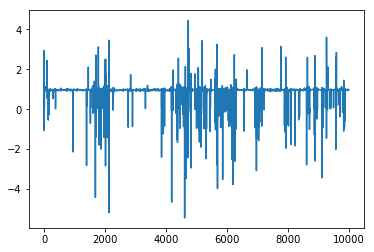

In [20]:
plt.plot([cluster_params[i][cluster_ids[i][0], 0] for i in range(len(cluster_ids))])